> source: https://www.gov.uk/government/statistics/transport-use-during-the-coronavirus-covid-19-pandemic

> methodo: https://www.gov.uk/government/statistics/transport-use-during-the-coronavirus-covid-19-pandemic/covid-19-transport-data-methodology-note

> the index:  "100 would mean that traffic is the same as the equivalent day in the first week of February"

> peg? https://www.gov.uk/government/news/rail-fares-capped-to-prevent-high-increases-for-passengers

<br><br>
## Import and clean

In [1]:
import pandas as pd

# pip install odfpy if necessary to handle .ODS files
import odf

import numpy as np

import matplotlib.pyplot as plt

In [2]:
# import 

file = '/Users/aidanair/Documents/DATA/ALL_DATASETS/c19_transport.ods'

df = pd.read_excel(file, engine="odf", skiprows=6)

df[:2]

,Date[note 1](weekends and bank holidays in grey),Cars[note 2],Light Commercial Vehicles[note 2],Heavy Goods Vehicles[note 2],All motor vehicles[note 2],"National Rail[notes 3,4,12,14]",Transport for London Tube[note 5],"Transport for London Bus[notes 5,7]","Bus (excl. London)[notes 6,8,9]","Cycling[notes 10,11]",Revised/ provisional [notes 13]
0,2020-03-01,1.03,1.11,1.08,1.04,0.97,1.04,1.02,..,..,NaN
1,2020-03-02,1.02,1.06,1.03,1.03,0.94,0.95,0.97,..,..,NaN


In [3]:
df.shape

(675, 11)

In [4]:
# rename columns

df.columns = 'date cars light_veh hgv all_motor rail tube tfl_bus bus_xlon cycling rev_prov'.split()

In [5]:
# data types are forced to string because of holding text '..' in cells

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675 entries, 0 to 674
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       675 non-null    datetime64[ns]
 1   cars       675 non-null    float64       
 2   light_veh  675 non-null    float64       
 3   hgv        675 non-null    float64       
 4   all_motor  675 non-null    float64       
 5   rail       675 non-null    object        
 6   tube       675 non-null    float64       
 7   tfl_bus    675 non-null    object        
 8   bus_xlon   675 non-null    object        
 9   cycling    675 non-null    object        
 10  rev_prov   22 non-null     object        
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 58.1+ KB


In [6]:
# replace all '..' with NaN (which are floats)

df = df.replace('..', np.NaN)


In [7]:
# recast types

df.rail = df.rail.astype(float)
df.tfl_bus = df.tfl_bus.astype(float)
df.bus_xlon = df.bus_xlon.astype(float)
df.cycling = df.cycling.astype(float)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675 entries, 0 to 674
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       675 non-null    datetime64[ns]
 1   cars       675 non-null    float64       
 2   light_veh  675 non-null    float64       
 3   hgv        675 non-null    float64       
 4   all_motor  675 non-null    float64       
 5   rail       674 non-null    float64       
 6   tube       675 non-null    float64       
 7   tfl_bus    605 non-null    float64       
 8   bus_xlon   655 non-null    float64       
 9   cycling    664 non-null    float64       
 10  rev_prov   22 non-null     object        
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 58.1+ KB


In [9]:
df[:3]


,date,cars,light_veh,hgv,all_motor,rail,tube,tfl_bus,bus_xlon,cycling,rev_prov
0,2020-03-01,1.03,1.11,1.08,1.04,0.97,1.04,1.02,NaN,NaN,NaN
1,2020-03-02,1.02,1.06,1.03,1.03,0.94,0.95,0.97,NaN,NaN,NaN
2,2020-03-03,1.01,1.05,1.02,1.02,0.95,0.95,0.96,NaN,NaN,NaN


In [10]:
# add column for day of week to handle weekends

df['weekday'] = pd.Series(df.date).dt.day_name()

In [11]:
df

,date,cars,light_veh,hgv,all_motor,rail,tube,tfl_bus,bus_xlon,cycling,rev_prov,weekday
0,2020-03-01,1.03,1.11,1.08,1.04,0.97,1.04,1.02,NaN,NaN,NaN,Sunday
1,2020-03-02,1.02,1.06,1.03,1.03,0.94,0.95,0.97,NaN,NaN,NaN,Monday
2,2020-03-03,1.01,1.05,1.02,1.02,0.95,0.95,0.96,NaN,NaN,NaN,Tuesday
3,2020-03-04,1.01,1.04,1.03,1.01,0.95,0.95,0.97,NaN,NaN,NaN,Wednesday
4,2020-03-05,1.00,1.03,1.02,1.00,0.97,0.92,0.92,NaN,NaN,NaN,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...
670,2021-12-31,0.68,0.61,0.37,0.65,0.35,0.55,0.77,0.39,0.7,p,Friday
671,2022-01-01,0.58,0.59,0.25,0.57,0.36,0.53,0.81,NaN,NaN,p,Saturday
672,2022-01-02,0.82,0.97,0.78,0.85,0.37,0.64,0.72,0.63,NaN,p,Sunday
673,2022-01-03,0.64,0.57,0.30,0.60,0.45,0.65,0.81,NaN,NaN,p,Monday


In [12]:

df.set_index('date', inplace=True)

In [13]:
df[:3]

,cars,light_veh,hgv,all_motor,rail,tube,tfl_bus,bus_xlon,cycling,rev_prov,weekday
date,,,,,,,,,,,
2020-03-01,1.03,1.11,1.08,1.04,0.97,1.04,1.02,NaN,NaN,NaN,Sunday
2020-03-02,1.02,1.06,1.03,1.03,0.94,0.95,0.97,NaN,NaN,NaN,Monday
2020-03-03,1.01,1.05,1.02,1.02,0.95,0.95,0.96,NaN,NaN,NaN,Tuesday


<br><br>
## exploratory viz

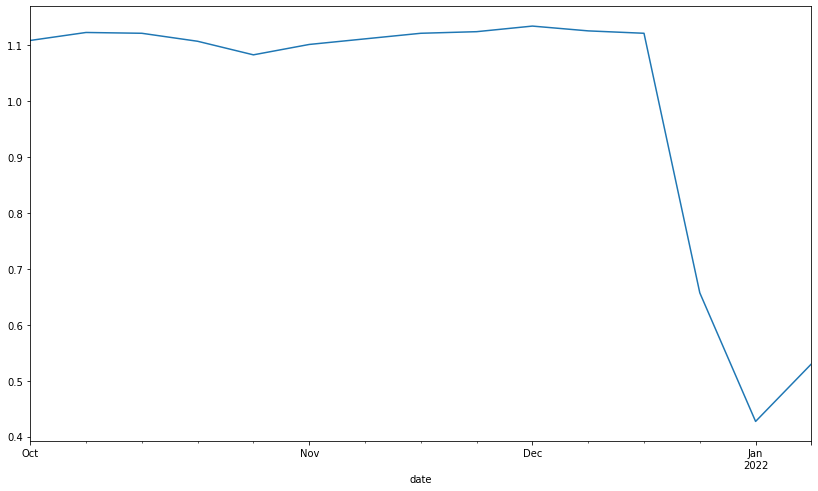

In [15]:
# hgv for last 100 days - collapsed mid-december

df[-100:].resample('W').mean().hgv.plot(figsize=(14, 8));

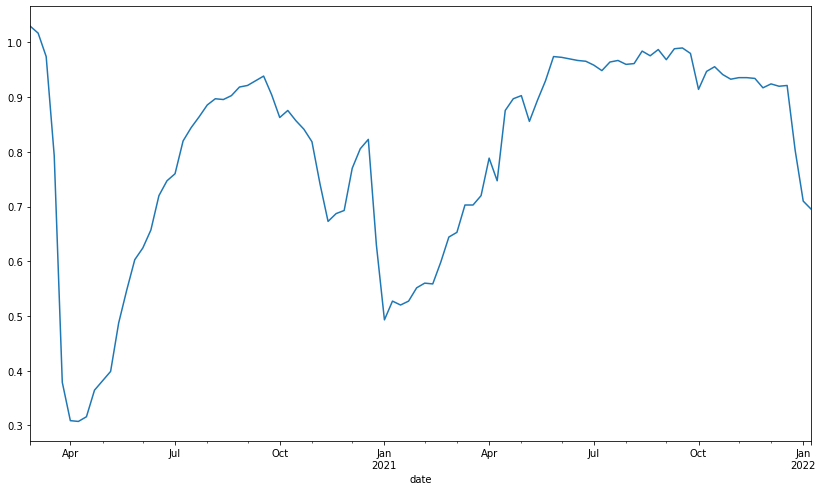

In [16]:
# cars by weekly average over almost two years

df.resample('W').mean().cars.plot(figsize=(14, 8));

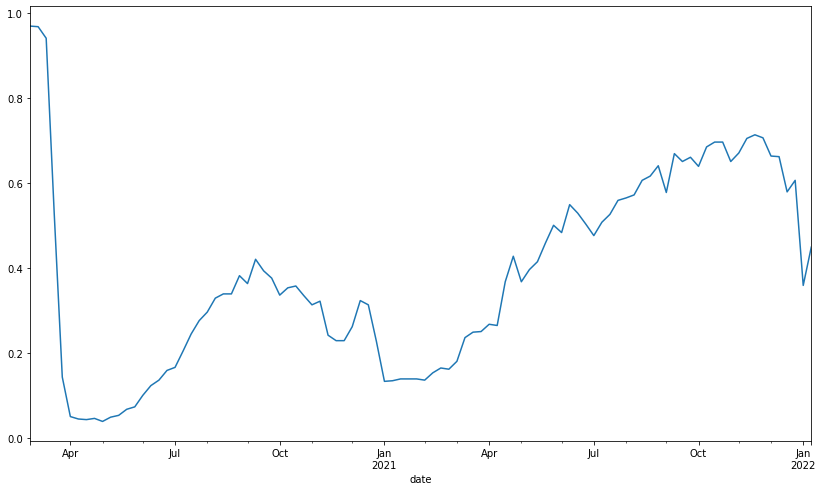

In [19]:
# rail hasn't recovered

df.resample('W').mean().rail.plot(figsize=(14, 8));

In [20]:
df

,cars,light_veh,hgv,all_motor,rail,tube,tfl_bus,bus_xlon,cycling,rev_prov,weekday
date,,,,,,,,,,,
2020-03-01,1.03,1.11,1.08,1.04,0.97,1.04,1.02,NaN,NaN,NaN,Sunday
2020-03-02,1.02,1.06,1.03,1.03,0.94,0.95,0.97,NaN,NaN,NaN,Monday
2020-03-03,1.01,1.05,1.02,1.02,0.95,0.95,0.96,NaN,NaN,NaN,Tuesday
2020-03-04,1.01,1.04,1.03,1.01,0.95,0.95,0.97,NaN,NaN,NaN,Wednesday
2020-03-05,1.00,1.03,1.02,1.00,0.97,0.92,0.92,NaN,NaN,NaN,Thursday
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31,0.68,0.61,0.37,0.65,0.35,0.55,0.77,0.39,0.7,p,Friday
2022-01-01,0.58,0.59,0.25,0.57,0.36,0.53,0.81,NaN,NaN,p,Saturday
2022-01-02,0.82,0.97,0.78,0.85,0.37,0.64,0.72,0.63,NaN,p,Sunday


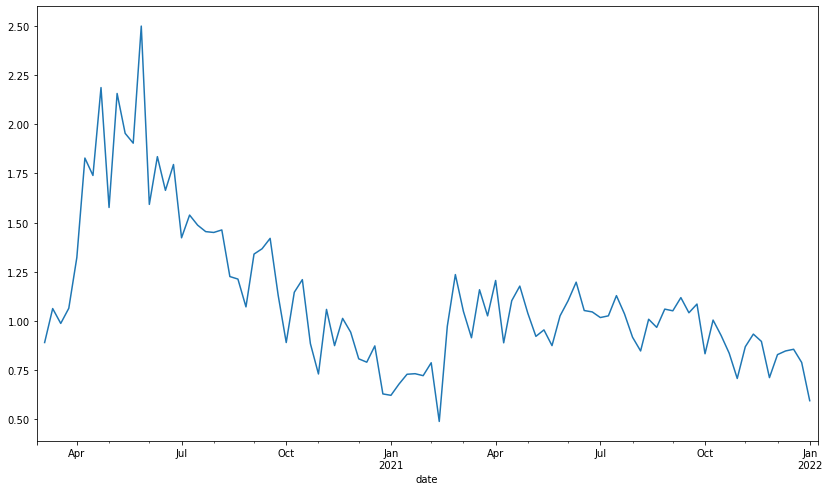

In [22]:
df.resample('W').mean().cycling.plot(figsize=(14, 8));

## rail

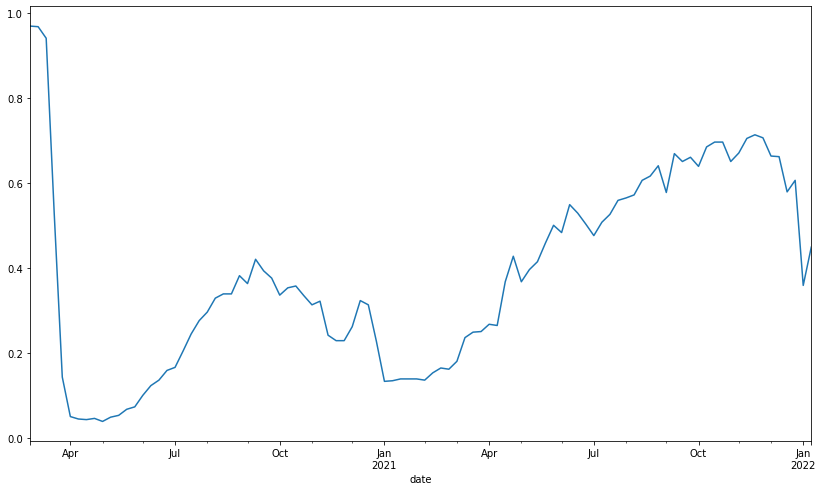

In [23]:
df.resample('W').mean().rail.plot(figsize=(14, 8));

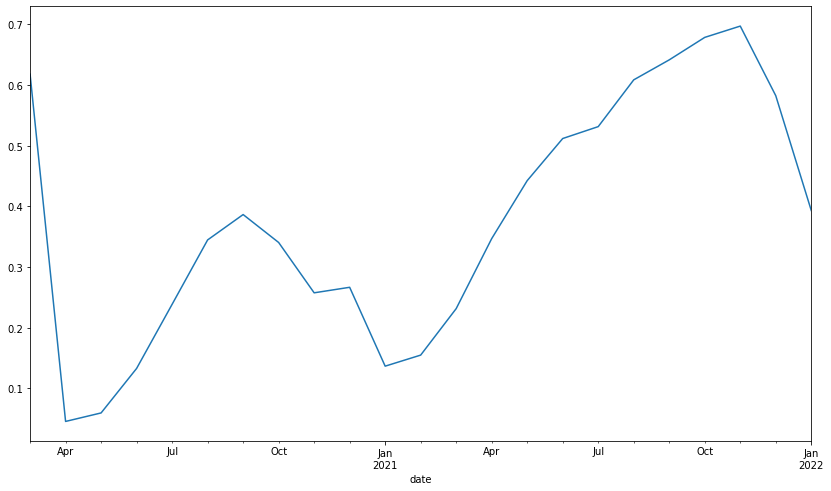

In [24]:
df.resample('M').mean().rail.plot(figsize=(14, 8));

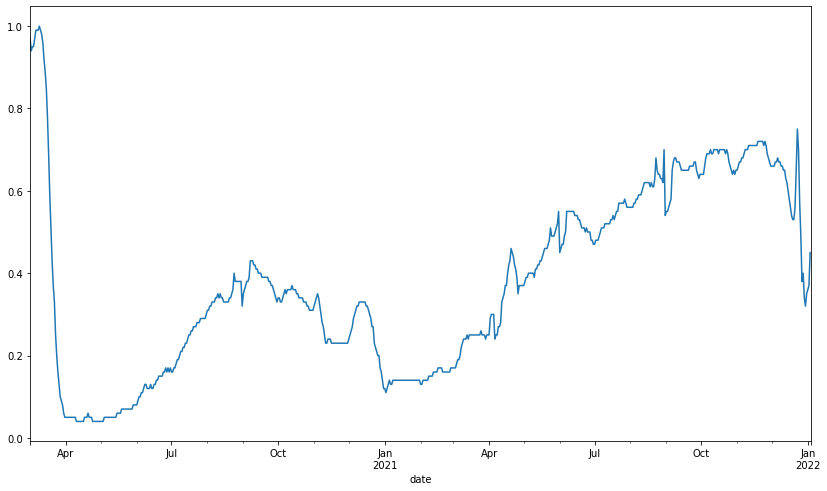

In [25]:
df.resample('D').mean().rail.plot(figsize=(14, 8));

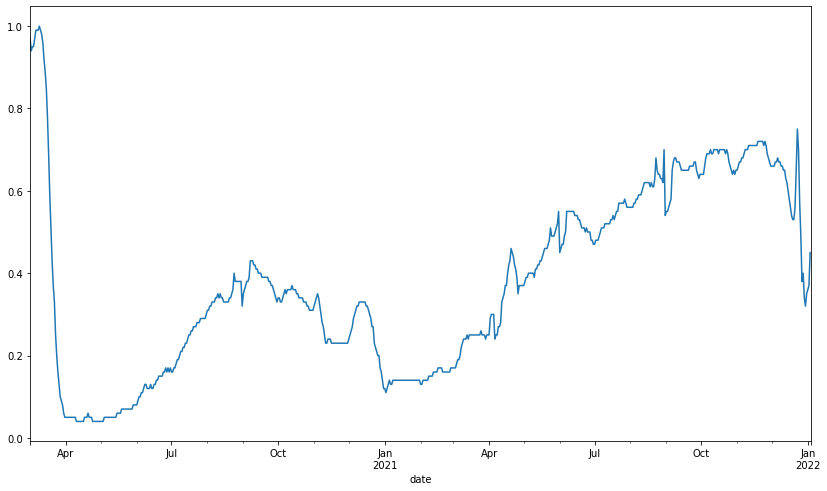

In [26]:
df.resample('D').mean().rail.plot(figsize=(14, 8));

## reference (excel import)

In [99]:
file_xls = '/Users/aidanair/Desktop/c19_transport.xls'

df_e = pd.read_excel(file_xls, 'Transport_use_(GB)', skiprows = 6)


In [100]:
df_e

,Date[note 1]\n(weekends and bank holidays in grey),Cars[note 2],Light Commercial Vehicles[note 2],Heavy Goods Vehicles[note 2],All motor vehicles[note 2],"National Rail[notes 3,4,12,14]",Transport for London Tube[note 5],"Transport for London Bus[notes 5,7]","Bus (excl. London)[notes 6,8,9]","Cycling[notes 10,11]",Revised/ provisional [notes 13]
0,2020-03-01,1.03,1.11,1.08,1.04,0.97,1.04,1.02,..,..,NaN
1,2020-03-02,1.02,1.06,1.03,1.03,0.94,0.95,0.97,..,..,NaN
2,2020-03-03,1.01,1.05,1.02,1.02,0.95,0.95,0.96,..,..,NaN
3,2020-03-04,1.01,1.04,1.03,1.01,0.95,0.95,0.97,..,..,NaN
4,2020-03-05,1.00,1.03,1.02,1.00,0.97,0.92,0.92,..,..,NaN
...,...,...,...,...,...,...,...,...,...,...,...
670,2021-12-31,0.68,0.61,0.37,0.65,0.35,0.55,0.77,0.39,0.7,p
671,2022-01-01,0.58,0.59,0.25,0.57,0.36,0.53,0.81,..,..,p
672,2022-01-02,0.82,0.97,0.78,0.85,0.37,0.64,0.72,0.63,..,p
673,2022-01-03,0.64,0.57,0.30,0.60,0.45,0.65,0.81,..,..,p
